# Average Salaries by Education in Saudi Arabia Data 

#### By Fatmah Alharthi

This document walks through the CRISP-DM process to find project goal.
- ##### Table of Contents :
    1. Business Understanding
    2. Data Understanding
    3. Data Preparation
    4. Data Modeling
    5. Evaluate the Results

## 1. Business Understanding :
In this project, I have used the [Average Salaries by Education in Saudi Arabia dataset](https://www.kaggle.com/majedalhulayel/average-salaries-by-education-in-saudi-arabia#). 
The dataset containing average salaries ( in SAR ) per education level per nationality and gender for 504 entries. The data is extracted and consolidated from 18 different files sourced from [GASTA](https://www.stats.gov.sa/en/814) from 2017 Q1 till 2021 Q2.

The Salary Is one of the Important aspects of the job for the employee and job seekers and for some workers it's the main driver of satisfaction ,So in this analysis, I will investigate how The salaries in Saudi Arabia are affected by the other features, and  the results will  be visualized for the poeple who interested in know how thier salaries will be affectd by nationality ,gender , education level in saudi arabia .


The project goal is to answer the following questions using the dataset :
1. Does higher education lead to higher Salaries (Does the employers pay more for thos have higher degrees and education)?
2. Are citizens in Saudi Arabia getting the same salary as noncitizens if they have the same degree level? How is Nationality related to salary? 
3. Who gets higher salaries in Saudi Arabia, Females or Males? is there any gender discrimination?
4. How does the COVID-19 pandemic Impact The salaries? 

As the second goal of this project, to build a predictive model to see if the salary can be predicted by the given features.

## 2. Data Understanding :
Importing necessary libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
%matplotlib inline

Importing data set 

In [2]:
#load in the dataset into a pandas dataframe
df = pd.read_csv('Salary_by_Education.csv')

#### Assessing Data
In this section, we detect and document the quality and tidiness issues using both visual assessment and programmatic assessement.

In [3]:
df.head()

,Degree Level,Nationality,Gender,Year Quarter,Salary,Currency
0,Primary,NonSaudi,Female,2017 Q1,1590,SAR
1,Primary,NonSaudi,Male,2017 Q1,2173,SAR
2,Primary,Saudi,Female,2017 Q1,4172,SAR
3,Primary,Saudi,Male,2017 Q1,6172,SAR
4,Primary,NonSaudi,Female,2017 Q2,1597,SAR


In [4]:
df.shape

(504, 6)

In [5]:
df.columns

Index(['Degree Level', 'Nationality', 'Gender', 'Year Quarter', 'Salary',
       'Currency'],
      dtype='object')

- The shape of The dataset is (504 rows, 6 columns) .

In [6]:
#Check any duplicates
df.duplicated().sum()

0

In [7]:
#Check null values
df.isnull().sum() 

Degree Level    0
Nationality     0
Gender          0
Year Quarter    0
Salary          0
Currency        0
dtype: int64

In [8]:
# check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Degree Level  504 non-null    object
 1   Nationality   504 non-null    object
 2   Gender        504 non-null    object
 3   Year Quarter  504 non-null    object
 4   Salary        504 non-null    int64 
 5   Currency      504 non-null    object
dtypes: int64(1), object(5)
memory usage: 23.8+ KB


- There is no missing (Null) values 

In [9]:
#descriptive statistics for the numeric variable
df.describe()

,Salary
count,504.000000
mean,8950.031746
std,6372.635277
min,1331.000000
25%,4194.000000
50%,7890.500000
75%,12448.750000
max,35622.000000


In [10]:
df.Nationality.value_counts()

Saudi       252
NonSaudi    252
Name: Nationality, dtype: int64

In [11]:
df.Gender.value_counts()

Female    252
Male      252
Name: Gender, dtype: int64

In [12]:
df['Degree Level'].value_counts() 

Master Degree    72
Doctorate        72
Primary          72
Secondary        72
Intermediate     72
Bachelor         72
Diploma          72
Name: Degree Level, dtype: int64

In [13]:
df.Currency.value_counts() 

SAR    504
Name: Currency, dtype: int64

- As there is only one value in this columns , it should be dropped and rename the 'Salary' column to indicate the Currency

In [14]:
 df['Year Quarter'].value_counts() 

2019 Q4    28
2020 Q2    28
2019 Q1    28
2020 Q1    28
2018 Q1    28
2018 Q3    28
2017 Q4    28
2017 Q1    28
2017 Q2    28
2018 Q4    28
2019 Q2    28
2017 Q3    28
2019 Q3    28
2018 Q2    28
2020 Q3    28
2021 Q1    28
2020 Q4    28
2021 Q2    28
Name: Year Quarter, dtype: int64

- we have to split this column into 2 columns, one for Year and the other one for Quarter

##### Quality issues
    1. Converting datatype ,A data type of the 'Nationality' and 'gender'and 'Degree Level' columns is string, should be catogrical.
    2. Renaming the column 'Salary' to indicate the currency to be descriptive name, 'Salary (SAR)'.

##### Tidiness issues
    3. Dropping unnecessary column , which is 'Currency' , Because it has the same value for all records.
    4. Add columns for 'year' , 'Quarter' , by extract the values from 'Year Quarter' column.


## 3. Data Preparation
#### Data Cleaning 
In this section, clean the issues that we documented previously while assessing. 
Important point is to make a copy of the original data before cleaning. 

In [15]:
#Make copy of original data
clean_df = df.copy()

### Issue #1:

- Converte datatypes of the 'Nationality' and 'Gender'and 'Degree Level' columns , to be catogrical.

In [16]:
# convert columns into categorical types
clean_df['Nationality'] = pd.Categorical(clean_df.Nationality)
clean_df['Gender'] = pd.Categorical(clean_df.Gender)
clean_df['Degree Level'] = pd.Categorical(clean_df['Degree Level'])

In [17]:
clean_df.dtypes

Degree Level    category
Nationality     category
Gender          category
Year Quarter      object
Salary             int64
Currency          object
dtype: object

### Issue #2:

- Rename the 'Salary' column

In [18]:
clean_df.rename(columns={'Salary': 'Salary (SAR)'}, inplace=True)

In [19]:
clean_df.columns

Index(['Degree Level', 'Nationality', 'Gender', 'Year Quarter', 'Salary (SAR)',
       'Currency'],
      dtype='object')

### Issue #3:

- Dropping unnecessary column , which is 'Currency' , Because it has the same value for all records.

In [20]:
clean_df.drop(columns=['Currency'],inplace=True)

In [21]:
clean_df.columns

Index(['Degree Level', 'Nationality', 'Gender', 'Year Quarter',
       'Salary (SAR)'],
      dtype='object')

### Issue #4:

- splitting 'Year Quarter' column into 2 columns

In [22]:
#the string is split by a space.
clean_df[['Year', 'Quarter']] = clean_df['Year Quarter'].str.split(' ', 1, expand=True)

In [23]:
#drop the 'Year Quarter' column after extracting values from it
clean_df.drop(columns=['Year Quarter'],inplace=True)

In [24]:
clean_df.head()

,Degree Level,Nationality,Gender,Salary (SAR),Year,Quarter
0,Primary,NonSaudi,Female,1590,2017,Q1
1,Primary,NonSaudi,Male,2173,2017,Q1
2,Primary,Saudi,Female,4172,2017,Q1
3,Primary,Saudi,Male,6172,2017,Q1
4,Primary,NonSaudi,Female,1597,2017,Q2


In [25]:
#Convert the type of year to be int 
clean_df['Year']= clean_df['Year'].astype(int)

In [26]:
clean_df.dtypes 

Degree Level    category
Nationality     category
Gender          category
Salary (SAR)       int64
Year               int32
Quarter           object
dtype: object

- The data wrangling is finished here, Now the cleaned data will be saved before starts analyzing

## Data Analysis and Visualization :

##### Q.1. Does the salary really grow with Degree Level (Does the employers pay well for thos have higher degrees and education)?

<AxesSubplot:xlabel='Degree Level', ylabel='Salary (SAR)'>

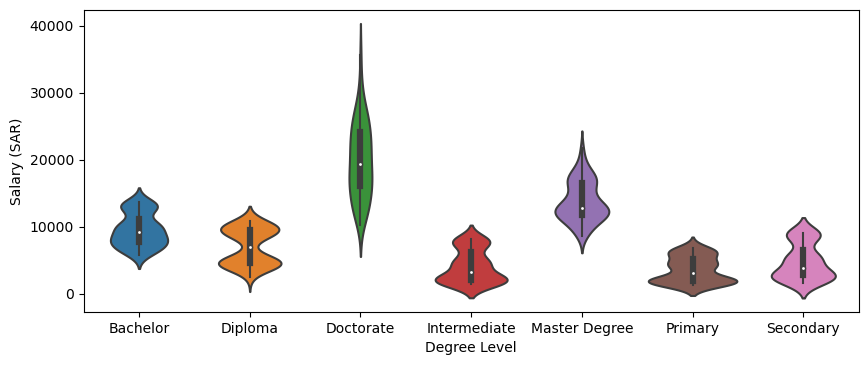

In [27]:
plt.figure(figsize=(10,4), dpi=100)
sns.violinplot(x="Degree Level", y="Salary (SAR)", data=clean_df)

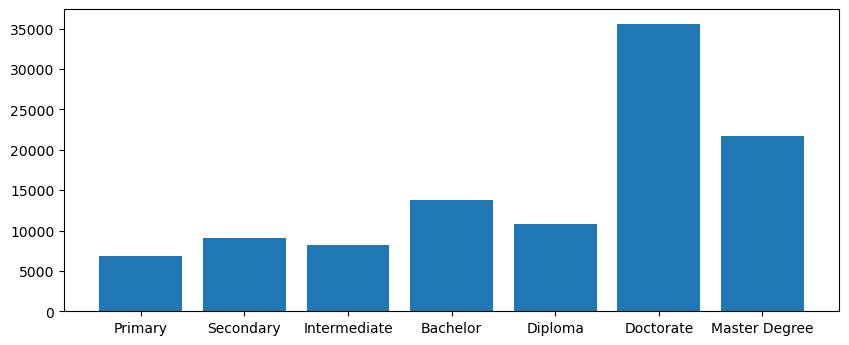

In [28]:
plt. figure(figsize=(10,4), dpi=100)
plt.bar(clean_df["Degree Level"],clean_df["Salary (SAR)"])
plt.show()

**Observation** :

Based on the above, 
- The salary has a strong relationship with the level of education and it gets higher with the higher degrees. 
- The people with doctorates get the highest salaries followed by the master degree holder then those who with the bachelor and Diploma, secondary, intermediate and primary  respectively
 

##### Q.2. Is citizens in Saudi Arabia get the same salary as noncitizens if they have the same degree level? How is Nationality related to salary?

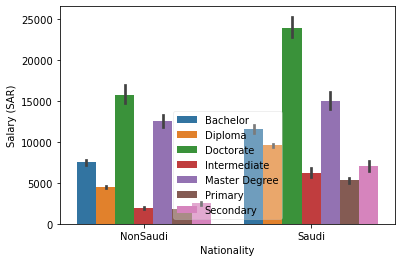

In [29]:
ax = sns.barplot(data = clean_df, x = 'Nationality', y = 'Salary (SAR)', hue = "Degree Level")
ax.legend(loc = 8, ncol = 1, framealpha = 0.3,)

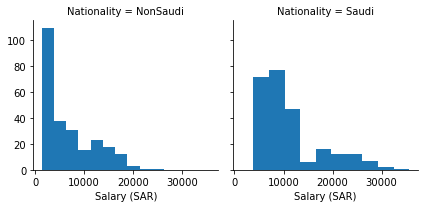

In [30]:
# Plot the Seaborn's FacetGrid
g = sns.FacetGrid(data = clean_df, col = 'Nationality')
g.map(plt.hist, "Salary (SAR)")

**Observation** :
- It's obvious that the citizens in Saudi Arabia get a higher salary than the noncitizens with the same degree level.

##### Q.3. who gets higher salaries in Saudi Arabia, Females or Males? is there any gender-discrimination

<AxesSubplot:xlabel='Gender', ylabel='Salary (SAR)'>

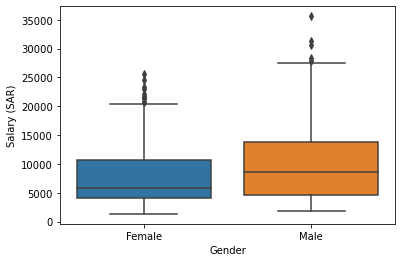

In [31]:
sns.boxplot(data=clean_df, y='Salary (SAR)', x='Gender')

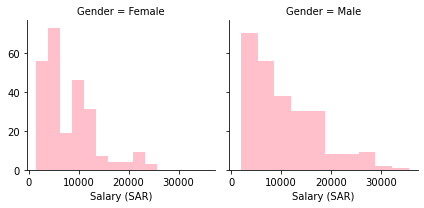

In [32]:
# Plot the Seaborn's FacetGrid
g = sns.FacetGrid(data = clean_df, col = 'Gender',hue_kws={'color': ['pink','blue']},)
g.map(plt.hist, "Salary (SAR)")

In [33]:
clean_df[clean_df.Gender == 'Male']['Salary (SAR)'].max()

35622

In [34]:
clean_df[clean_df.Gender == 'Female']['Salary (SAR)'].max()

25676

**Observation** :

Based on the results from the data, 
- we can say the males get higher salaries but that does not mean there is a gender-discrimination , may that is because of their level of education, I will examine this next.
- The highest salary the male had is 35,622 SAR while the highest salary the female had is 25676 SAR ,which is a really big difference at approximately 10,000 SAR 

In [35]:
clean_df[clean_df.Gender == 'Male']['Degree Level'].value_counts()

Bachelor         36
Diploma          36
Doctorate        36
Intermediate     36
Master Degree    36
Primary          36
Secondary        36
Name: Degree Level, dtype: int64

In [36]:
clean_df[clean_df.Gender == 'Female']['Degree Level'].value_counts()

Bachelor         36
Diploma          36
Doctorate        36
Intermediate     36
Master Degree    36
Primary          36
Secondary        36
Name: Degree Level, dtype: int64

- Unexpectedly, The number of females and males in each degree level of education is equal,So that might depend on other factors that are not provided such as the  'employer'. 

- Or simply might that because the data does not reflect the real world. I said this by reason of  I don't see any diff in the salaries in Saudi Arabia between males and females any gender discrimination as citizen female.

##### Q.4. How does the COVID-19 pandemic Impact The salaries?
I will use the Year and Quarter columns to answer this question, The pandemic started in January 2020, which is in the 1st quarter (Q1)of the year (2020). So the data will be divide into 2 groups, before Q1 of 2020 (before the pandemic) , which is all quarters of 2018,2019,2019, and after that  (after he pandemic) which is from the start of 2020

In [45]:

def divide_df(df):
    """
    this function divide the data frame into 2 groups.
       Parameters:
    arg1 (pandas DataFrame): this is a Series with the data type of each column, which containing the loaded dataset
  
    Returns:
    before_pandemic(pandas DataFrame) : the part of the data before Q1 of 2020 (before the pandemic),which is all quarters of 2018,2019,2019,
    after_pandemic(pandas DataFrame) :the part of the data after he pandemic which is from the start of 2020
"""
    before_pandemic = df[(df.Year != 2020) & (df.Year != 2021)]
    after_pandemic = df[(df.Year == 2020) | (df.Year == 2021)]
    return before_pandemic,after_pandemic

before_pandemic,after_pandemic = divide_df(clean_df)

In [46]:
before_pandemic.Year.value_counts()

2017    112
2018    112
2019    112
Name: Year, dtype: int64

In [47]:
after_pandemic.Year.value_counts()

2020    112
2021     56
Name: Year, dtype: int64

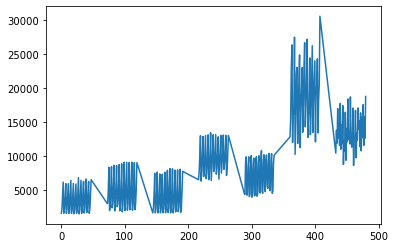

In [48]:
# Plot a simple line chart
plt.plot(before_pandemic["Salary (SAR)"])
plt.show()

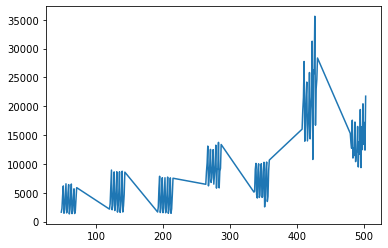

In [49]:
# Plot a simple line chart
plt.plot(after_pandemic["Salary (SAR)"])
plt.show()

C:\Users\Fatma\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary (SAR)', ylabel='Density'>

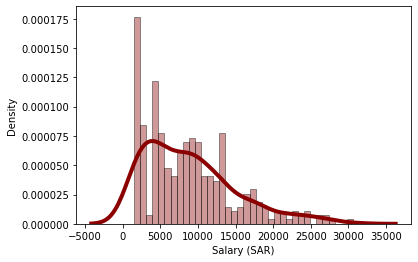

In [50]:
# Density Plot and Histogram for befor_pandemic 
sns.distplot(before_pandemic["Salary (SAR)"], hist=True, kde=True, 
             bins=int(180/5), color = 'darkred', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

C:\Users\Fatma\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary (SAR)', ylabel='Density'>

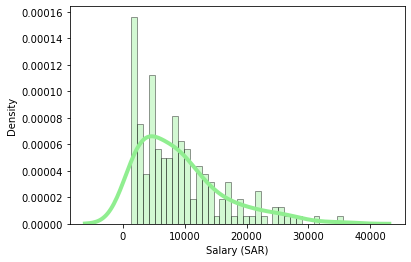

In [51]:
# Density Plot and Histogram for after_pandemic 
sns.distplot(after_pandemic["Salary (SAR)"], hist=True, kde=True, 
             bins=int(180/5), color = 'lightgreen', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

C:\Users\Fatma\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Fatma\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary (SAR)', ylabel='Density'>

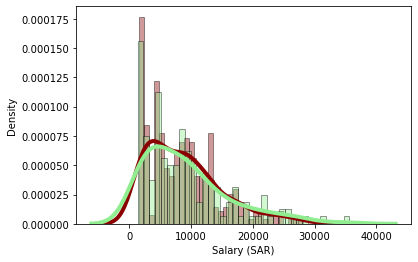

In [52]:
# 2 ni 1 to see the diff
# Density Plot and Histogram for befor_pandemic 
sns.distplot(before_pandemic["Salary (SAR)"], hist=True, kde=True, 
             bins=int(180/5), color = 'darkred', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
# Density Plot and Histogram for after_pandemic 
sns.distplot(after_pandemic["Salary (SAR)"], hist=True, kde=True, 
             bins=int(180/5), color = 'lightgreen', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

**Observation** :
- We can't say the salaries are not affected by the pandemic as we see that the curve of the salaries before the pandemic is slightly higher than the salaries curve during the pandemic.



## 4. Data Modeling
Although I dont see that the salary  is dependet only on the Degree Level	, Nationality and Gender because this is a little  naive , As we have the years of working experience which is consederd an imporatnt factor . Also , there are others factors .
As part of this project ,I will try to develop a predicitve model to show a relationship between the only provided featurs  and the salary using simple linear regression .

Categorical variables require special attention in regression analysis because, unlike the numeric variables, they cannot by entered into the regression equation just as they are. Instead, they need to be recoded into a series of variables which can then be entered into the regression model

In [53]:
#Encode
#In the above data frame, we have a categorical variable, so we need to add dummy variables instead.
var_to_dummy = clean_df[['Nationality','Gender','Degree Level']]
dummies = pd.get_dummies(data=var_to_dummy,drop_first=True) #this code added the dummy variable in form of 0 and 1, which is easy to interpret for the regression model.
#Join the encoded df
dummies.columns
clean_df = clean_df.join(dummies)
clean_df.drop(columns=['Nationality','Gender','Degree Level','Year', 'Quarter'],inplace=True)

In [54]:
clean_df.columns

Index(['Salary (SAR)', 'Nationality_Saudi', 'Gender_Male',
       'Degree Level_Diploma', 'Degree Level_Doctorate',
       'Degree Level_Intermediate', 'Degree Level_Master Degree',
       'Degree Level_Primary', 'Degree Level_Secondary'],
      dtype='object')

Predicting Salary using Linear Model

In [55]:
#the independent variables will be the all except salary
X = clean_df.drop(columns=['Salary (SAR)'])
#the dependent variables would be the salary
Y = clean_df['Salary (SAR)']
#creating a train and test dataset
x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size =0.2)

In [56]:
#create the instance of LinearRegression
model = LinearRegression()
# fit the model
model.fit(x_train,y_train)

LinearRegression()

In [57]:
#make a predictions  on the test set 
predictions = model.predict(x_test)
#measuring the accuracy of the model 
model.score(x_test,y_test)

0.9334175096244792

- The model accuracy is 93.34%, Which is considered good.
- That means we can predict the salary using the chosen independent variables correctly with 93.34%

C:\Users\Fatma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


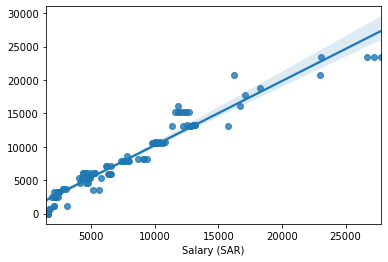

In [60]:
#plot the predicted variable
sns.regplot(y_test,predictions);

In [61]:
X_train_Sm= sm.add_constant(x_train)
X_train_Sm= sm.add_constant(x_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:           Salary (SAR)   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     648.0
Date:                Mon, 22 Nov 2021   Prob (F-statistic):          1.88e-221
Time:                        09:54:57   Log-Likelihood:                -3574.9
No. Observations:                 403   AIC:                             7168.
Df Residuals:                     394   BIC:                             7204.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

## 5. Results and Conclusions:

**In conclusion, The following points are answers for the posed questions in the beginning  as a result of this project :**

- The salary has a strong relationship with the level of education and it gets higher with the higher degrees.
- The citizens in Saudi Arabia get a higher salary than the noncitizens with the same degree level.
- The salaries are affected a little by the pandemic, the salaries before the pandemic are slightly higher than the salaries during the pandemic.
- The developed Linear regression model can predict Salary with 91.5% as accuracy. 
